# Activity: Analyzing Lagrangian Dynamics with Constraints (Solution)

One of the strengths of Lagrangian dynamics is that you do not have to have a mathematical description of the forces for all space and time. We can see that in this upside-down ice cream cone problem. How would you write the force of the cone for all space and time?

*Answer:* :shrugs:

![Rubric](../../assets/images/cylindrical_cone_mass.jpg)

## Last time

We used Lagrangian Analysis to produce the following differential equations:

$$m\ddot{r} = (mr^2\dot{\theta}-mg\cot\alpha)\cos^2\alpha$$

$$\dfrac{d}{dt}\left(mr^2\dot{\theta}\right) = 0$$

We made a note that the second one tells about conservation of angular momentum in the $z$-direction.


Let's write this a bit different, so we can integrate the situation:

$$m\ddot{r} = (mr^2\dot{\theta}-mg\cot\alpha)\cos^2\alpha$$

$$2mr\dot{r}\dot{\theta}+mr^2\ddot{\theta} = 0$$

Now we need to write this as a set of first order differential equations. Let $v=\dot{r}$ and $\omega=\dot{\theta}$. Then we get the following four equations

$$\dot{v} = \left(r^2\omega-g\cot\alpha\right)\cos^2\alpha$$

$$\dot{r} = v$$

$$\dot{\omega} = -2\dfrac{v\omega}{r}$$

$$\dot{\theta} = \omega$$

## Numerically Integrate our EOM

Now we have four 1st order, coupled, nonlinear differential equations that describe the motion of this bead. We are going to solve for $r(t)$ and $\theta(t)$ for a given choice of $\alpha$. This will produce a solution for $z(t) = \dfrac{r(t)}{\tan\alpha}$.  Let's pick some initial conditions and build a numerical model. 

Using the integrator of your choice, numerically integrate and plot (in 3d) the motion of the bead for the following conditions:

1. Bead starts from rest and is let go
2. Bead starts at a given height and is given a low speed (less than needed to orbit)
3. Bead starts at a given height and is given a low speed (more than needed to orbit)
4. Can you find a flat horizontal orbit?

We have written the code below so that you could use odeint if you choose. This system is very sensitive, so I've given you a set of initial conditions in the right scale for the problem.

The goals for this work is to:

1. Integrate the equations of motion numerically.
2. Plot the motion in various ways (2D slices and 3D space)

We can then use those elements to extract some physics. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint

def BeadStuckOnCone(x, t, g=9.8, alpha=np.pi/3):
    '''BeadStuckOnCone computes the derivatives for the
    bead stuck on a straight sided cone problem. The order
    of the variables x are r, rdot (v), theta, thetadot (omega).
    It returns rdot, rdoubledot (vdot), thetadot, and 
    thetadoubledot (omegadot)'''
    
    r, v, theta, omega = x
    dxdt = [v, (r**2*omega-g/np.tan(alpha))*np.cos(alpha)**2, omega, -2*v*omega/r]
    return dxdt

## Coonstants for the problem
g = 9.8
alpha = np.pi/3

## Initial Conditions
y0 = [10,0,0,0.0565]  
t = np.linspace(0,100,1001)

sol = odeint(BeadStuckOnCone, y0, t, args=(g, alpha))

r = sol[:, 0]
theta = sol[:, 2]

x = r*np.cos(theta)
y = r*np.sin(theta)
z = r/np.tan(alpha)


/Users/caballero/opt/anaconda3/envs/teaching/lib/python3.10/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


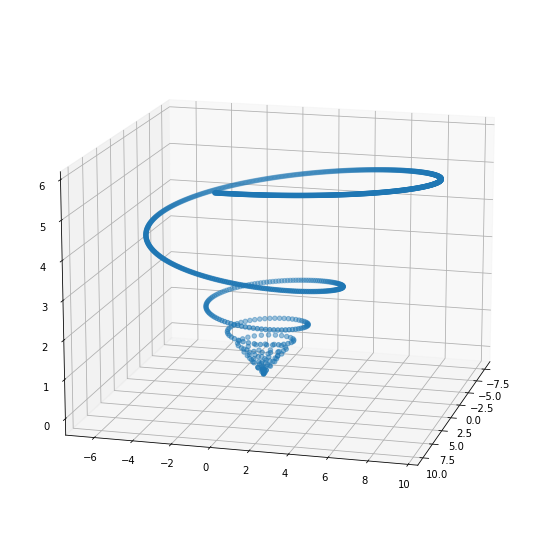

In [2]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(azim=15, elev=15)
ax.scatter3D(x,y,z)